## helper functions (ignore) scroll down

In [1]:
# will use Downing fig 11 for testing on this
class Figure11:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                    legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.memory = []
        self.memory_position = 0
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (1, 2)) or (next == (1, 3)) or (next == (2, 2)) or (next == (2, 3)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(1, 2)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 2)] = 5
        current_map[(2, 3)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [2]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        self.memory = []
        self.memory_position = 0
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [3]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        self.memory = []
        self.memory_position = 0
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None   

    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    #valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
    valid_learners = [lrnr for lrnr in team.learners]
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars))
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
    #print(action)
    return top_learner, action

In [5]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None   

    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    #valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
    valid_learners = [lrnr for lrnr in team.learners]
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars))
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
    #print(action)
    return top_learner, action

In [6]:
# run a given team after training
def post_training_run (env_name, team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    actions = []
    learners = []
    states = []
    #print(states)
    states.append(env.current_state)
    learners.append(l_t)
    actions.append(a_t)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        learners.append(l_t)
        actions.append(a_t)
        total_reward += reward
        if isDone:
            return states, actions, learners, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        #print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        #if l_t.id != l_next.id:
        #    update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, actions, learners, total_reward

In [7]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

# Start Here

## Load file naming conventions
### saved-runs/{envName}_{memory_size}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{lemarkian}_{epsilon}_{alpha}_{discount}_{run}_{gen}.pk1

## Naming conventions for figure loader
### saved-figures/{envName}_{memory_size}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{lemarkian}_{epsilon}_{alpha}_{discount}_{run}.csv

In [8]:
import numpy as np
import pandas as pd
import random
import time
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

## Fitness Curve Averaged over 5 Runs

In [9]:
# environmental parameters
# envName = 'basegpfig11'
# envName = 'basegpfig12'
# envName = 'basegpfig13'
# envName = 'randomstartsbasegpfig13'
# envName = 'fig9'
# envName = 'fig11'
# envName = 'fig12'
# envName = 'fig13'
envName = 'oppositesamplesfig13'
# envName = 'leftgoalfig12'
# envName = 'leftgoalfig13'
# envName = 'randomstartsfig9'
# envName = 'randomstartsfig11'
# envName = 'randomstartsfig12'
# envName = 'randomstartsfig13'
goalReached = 100
memorySize = 20
legalMove = 0.1
illegalMove = -0.01
outOfBounds = -0.01
memoryRepeat = -0.01
goalReached = 100
# RL parameters
epsilon = 0.1
alpha = 0.05
discount = 0.45#0.9
# run parameters
lamarckian = 1
# trainer parameters
# initMaxProgSize = 48

initMaxProgSize = 24#64#24
nRegisters = 4#8#4
nActRegisters = 0
initMaxActProgSize = 0


pLrnDel=0.3#0.7
pLrnAdd=0.2#0.7
pLrnMut=0.7#0.3
pProgMut=0.5#0.66
pActMut=0.7#0.33
pInstDel=0.5
pInstAdd=0.5
pInstSwp=0.5
pInstMut=0.5

initMaxTeamSize = 2
maxTeamSize = 4#5#4
gap = 0.5

teamPopSize = 50
pActAtom = 1.0

figs = []

for i in range(20):
    figs.append(pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_'+str(goalReached)+'_'+str(teamPopSize)+'_'+str(pActAtom)+'_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+str(nActRegisters)+'_'+str(initMaxActProgSize)+'_'+str(initMaxTeamSize)+'_'+str(maxTeamSize)+'_'+str(gap)+'_'+str(pLrnDel)+'_'+str(pLrnAdd)+'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+'_'+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_'+str(i)+'.csv'))

# fig_0 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5_'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_0.csv')
# fig_1 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_1.csv')
# fig_2 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_2.csv')
# fig_3 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_3.csv')
# fig_4 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_4.csv')
# fig_5 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_5.csv')
# fig_6 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_6.csv')
# fig_7 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_7.csv')
# fig_8 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_8.csv')
# fig_9 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_9.csv')
# fig_10 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_10.csv')
# fig_11 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_11.csv')
# fig_12 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_12.csv')
# fig_13 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_13.csv')
# fig_14 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_14.csv')
# fig_15 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_15.csv')
# fig_16 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_16.csv')
# fig_17 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_17.csv')
# fig_18 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_18.csv')
# fig_19 = pd.read_csv('saved-figures/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_100_50_1.0_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+{nActRegisters}+'_'+{initMaxActProgSize}+'_2_5_0.5'+'_'+str(pLrnAdd)'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_19.csv')

# figs = [fig_0, fig_1, fig_2, fig_3, fig_4, fig_5, fig_6, fig_7, fig_8, fig_9, fig_10, fig_11, fig_12, fig_13, fig_14, fig_15, fig_16, fig_17, fig_18, fig_19]

In [10]:
# if (envName == 'randomstartsfig11') or (envName == 'randomstartsfig12') or (envName == 'randomstartsfig13'):
#     starts = pd.read_csv('saved-figures/'+envName+'_starts.csv')
#     print(starts)

(-30, 130)

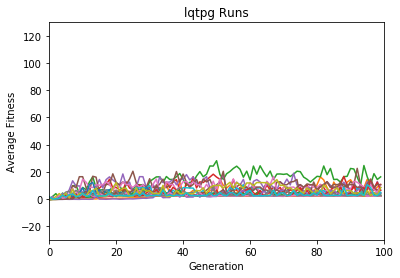

In [11]:
for i in range(len(figs)):
    plt.plot(figs[i]['average_score'].tolist(), label='Run: '+str(i))
    
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Average Fitness")
plt.ylim(-30,130)
#plt.legend()

(-30, 130)

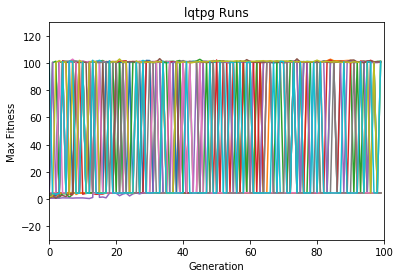

In [12]:
for i in range(len(figs)):
    plt.plot(figs[i]['max_score'].tolist(), label='Run: '+str(i+1))
    
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Max Fitness")
plt.ylim(-30,130)

(-30, 130)

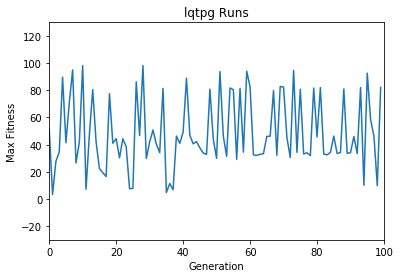

In [13]:
maxes_averaged = np.zeros(100)
for i in range(len(figs)):
    maxes_averaged += figs[i]['max_score']
    if (i > 0):
        maxes_averaged /= 2
    
# maxes_averaged = sum(figs['max_score'])/len(figs['max_score'])

plt.plot(maxes_averaged, label='Over 20 Runs')
    
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Max Fitness")
plt.ylim(-30,130)

(-30, 130)

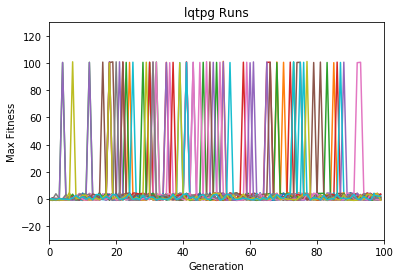

In [14]:
for i in range(len(figs)):
    plt.plot(figs[i]['median_score'].tolist(), label='Run: '+str(i+1))
    
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Max Fitness")
plt.ylim(-30,130)
#plt.legend()

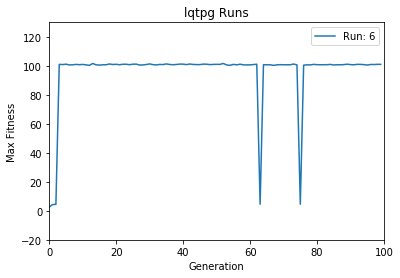

In [15]:
run = 5
plt.plot(figs[run]['max_score'].tolist(), label=f'Run: {run+1}')
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Max Fitness")
plt.ylim(-20,130)
plt.legend()

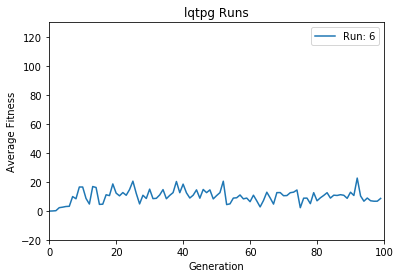

In [16]:
plt.plot(figs[run]['average_score'].tolist(), label=f'Run: {run+1}')
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Average Fitness")
plt.ylim(-20,130)
plt.legend()

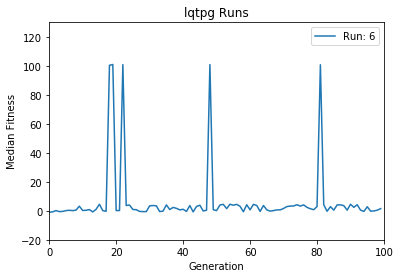

In [17]:
plt.plot(figs[run]['median_score'].tolist(), label=f'Run: {run+1}')
plt.title("lqtpg Runs")
plt.xlabel("Generation")
plt.xlim(0,100)
plt.ylabel("Median Fitness")
plt.ylim(-20,130)
plt.legend()

## Run Individual Champion Team

### Choose the champ's gen and run

In [18]:
from tpg.agent import loadAgent
def load_champion(agent_path):
    agent = loadAgent(agent_path)
    agent.configFunctionsSelf()
    print(agent.team)
    return agent.team

In [19]:
# reconstruct the agent, using the parameters in the file name
run = 9
gen = 50
file_name = 'saved-runs/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_'+str(goalReached)+'_'+str(teamPopSize)+'_'+str(pActAtom)+'_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+str(nActRegisters)+'_'+str(initMaxActProgSize)+'_'+str(initMaxTeamSize)+'_'+str(maxTeamSize)+'_'+str(gap)+'_'+str(pLrnDel)+'_'+str(pLrnAdd)+'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+'_'+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_'+str(run)+'_'+str(gen)+'.pk1'
print(file_name)
champ = load_champion(file_name)

if (envName == 'fig11') or (envName == 'randomstartsfig11'):
    env = Figure11(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
elif (envName == 'fig12') or (envName == 'randomstartsfig12'):
    env = Figure12(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
elif envName == 'leftgoalfig12':
    env = Figure12(5, 5, (0, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
elif envName == 'leftgoalfig13':
    env = Figure13(5, 5, (2, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
else: # fig13 and randomstartsfig13
    env = Figure13(5, 5, (2, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

saved-runs/oppositesamplesfig13_20_0.1_-0.01_-0.01_-0.01_100_50_1.0_4_24_0_0_2_4_0.5_0.3_0.2_0.7_0.5_0.7_0.5_0.5_0.5_0.5_1_0.1_0.05_0.45_9_50.pk1


In [20]:
#print(champ.q_table)
for q_value in champ.q_table:
    print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

#print('\n\n\n')
for i in range(10):
    print('Run: ' + str(i) + ' -----')
    states, actions, learners, score = post_training_run(envName, champ, epsilon, alpha, discount)
    print(score)
    for j in range(len(states)):
        print(str(states[j]) + '  Action: ' + str(actions[j]) + ' Learner: ' + str(learners[j].id))
    print('\n\n')
#print(champ.q_table)
#print('\n\n\n')
for q_value in champ.q_table:
    print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

41f19c13-84d1-49af-9f3d-fbc26e4993fd 3 0.009251989210085566
41f19c13-84d1-49af-9f3d-fbc26e4993fd 2 0.00829531458735096
9e5b3602-cf70-4b1b-b089-ca668cd7c31e 1 0.009650341609248003
9e5b3602-cf70-4b1b-b089-ca668cd7c31e 0 0.0029078962676239726
Run: 0 -----
-0.7600000000000003
(4, 0)  Action: 3 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 0)  Action: 3 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 0)  Action: 1 Learner: 9e5b3602-cf70-4b1b-b089-ca668cd7c31e
(4, 1)  Action: 2 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 1)  Action: 1 Learner: 9e5b3602-cf70-4b1b-b089-ca668cd7c31e
(4, 0)  Action: 3 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 0)  Action: 1 Learner: 9e5b3602-cf70-4b1b-b089-ca668cd7c31e
(4, 0)  Action: 3 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 0)  Action: 1 Learner: 9e5b3602-cf70-4b1b-b089-ca668cd7c31e
(4, 0)  Action: 3 Learner: 41f19c13-84d1-49af-9f3d-fbc26e4993fd
(4, 0)  Action: 1 Learner: 9e5b3602-cf70-4b1b-b089-ca668cd7c31e
(4, 0)  Action: 3 Learn

### Helper functions for post training run

In [21]:
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


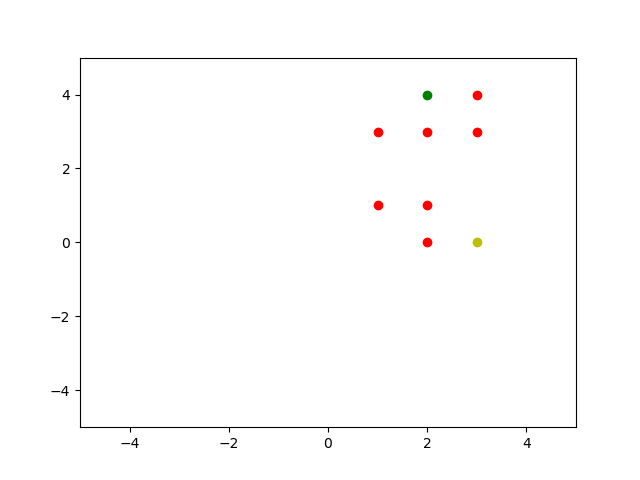

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

fig = plt.figure()
x = [0, 1, 2]
y = [0, 1, 2]

lines = plt.plot([], 'bo')
line = lines[0]

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def animate(frame):
    #line.set_data((0, 1), (states[frame][1], states[frame][0]))
#     obs_x = [1]
#     obs_y = [1]
#     plt.plot(obs_x, obs_y, 'ro')
    # obstacles
    obs_x = [2, 1, 2, 1, 2, 3, 3]
    obs_y = [0, 1, 1, 3, 3, 3, 4]
    # win state
    win_x = [2]
    win_y = [4]
    # the animated trajectory
    plt.cla()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    traj_x = []
    traj_y = []
    for i in range(frame+1):
        traj_x.append(states[i][0])
        traj_y.append(states[i][1])
    # plot all of the points
    plt.plot(obs_x, obs_y, 'ro')
    plt.plot(win_x, win_y, 'go')
#     plt.plot(traj_x, traj_y, 'b-')
    plt.plot(states[frame][0], states[frame][1], 'yo')
        
anim = FuncAnimation(fig, animate, frames = len(states), interval = 1000)
file_name = 'saved-animations/'+envName+'_'+str(memorySize)+'_'+str(legalMove)+'_'+str(illegalMove)+'_'+str(outOfBounds)+'_'+str(memoryRepeat)+'_'+str(goalReached)+'_'+str(teamPopSize)+'_'+str(pActAtom)+'_'+str(nRegisters)+'_'+str(initMaxProgSize)+'_'+str(nActRegisters)+'_'+str(initMaxActProgSize)+'_'+str(initMaxTeamSize)+'_'+str(maxTeamSize)+'_'+str(gap)+'_'+str(pLrnDel)+'_'+str(pLrnAdd)+'_'+str(pLrnMut)+'_'+str(pProgMut)+'_'+str(pActMut)+'_'+str(pInstDel)+'_'+str(pInstAdd)+'_'+str(pInstSwp)+'_'+str(pInstMut)+'_'+str(lamarckian)+'_'+str(epsilon)+'_'+str(alpha)+'_'+str(discount)+'_'+str(run)+'_'+str(gen)+'.gif'
anim.save(file_name, dpi=1000, writer=PillowWriter(fps=200))
plt.grid(alpha=1)
plt.show()
